In [1]:
import joblib
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from RF_Model_Functions import *
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus
from scipy.signal import savgol_filter
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

C:\Users\smgls\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
spectra_train = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/y_new_train.joblib')
spectra_test = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/y_test.joblib')
labels_train = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/x_new_train.joblib').reset_index()
labels_test = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/x_test.joblib').reset_index()
labels_train_smaller = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/x_train.joblib').reset_index()
spectra_train_smaller = joblib.load('cache/r20200406_234541_50.0sc_50.0sp_1_CPU/spectral/y_train.joblib')

Visualize Training Set - Histograms of the size parameters

In [3]:
labels_test_A_V = labels_test.drop(columns=['index', 'ShortestDim',
                                                                           'MiddleDim', 'LongDim', 'Material_SiN',
                                                                           'Material_SiO2', 'Material_Au',
                                                                           'Geometry_parallelepiped',
                                                                           'Geometry_wire',
                                                                           'Geometry_sphere', 'Geometry_TriangPrismIsosc'])
labels_test_short = labels_test.drop(columns=['index', 'log Area/Vol',
                                                                           'MiddleDim', 'LongDim', 'Material_SiN',
                                                                           'Material_SiO2', 'Material_Au',
                                                                           'Geometry_parallelepiped',
                                                                           'Geometry_wire',
                                                                           'Geometry_sphere', 'Geometry_TriangPrismIsosc'])
labels_test_mid = labels_test.drop(columns=['index', 'ShortestDim',
                                                                           'log Area/Vol', 'LongDim', 'Material_SiN',
                                                                           'Material_SiO2', 'Material_Au',
                                                                           'Geometry_parallelepiped',
                                                                           'Geometry_wire',
                                                                           'Geometry_sphere', 'Geometry_TriangPrismIsosc'])
labels_test_long = labels_test.drop(columns=['index', 'ShortestDim',
                                                                           'MiddleDim', 'log Area/Vol', 'Material_SiN',
                                                                           'Material_SiO2', 'Material_Au',
                                                                           'Geometry_parallelepiped',
                                                                           'Geometry_wire',
                                                                           'Geometry_sphere', 'Geometry_TriangPrismIsosc'])

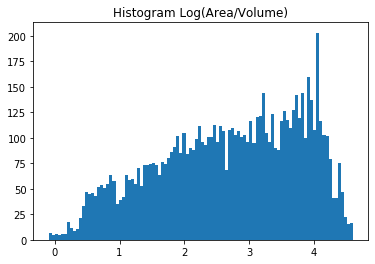

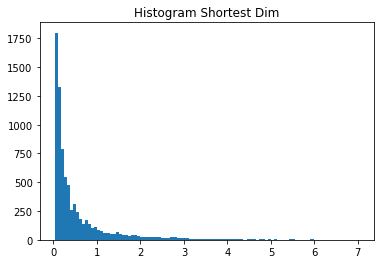

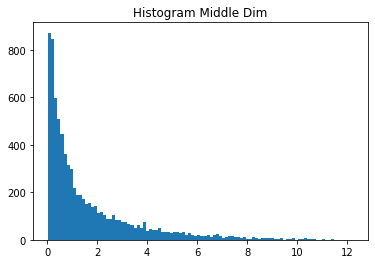

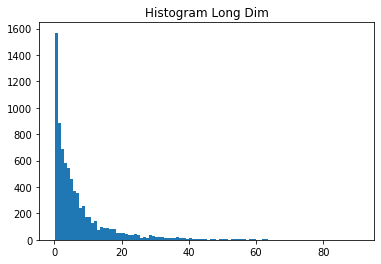

In [4]:
plt.hist(np.asarray(labels_test_A_V), 100)
plt.title("Histogram Log(Area/Volume)")
plt.show()
plt.hist(np.asarray(labels_test_short), 100)
plt.title("Histogram Shortest Dim")
plt.show()
plt.hist(np.asarray(labels_test_mid), 100)
plt.title("Histogram Middle Dim")
plt.show()
plt.hist(np.asarray(labels_test_long), 100)
plt.title("Histogram Long Dim")
plt.show()

In [5]:
from_one_hot_dict = {(1.,0.,0.,0.) : 0, (0.,1.,0.,0.) : 1, (0.,0.,1.,0.) : 2, (0.,0.,0.,1.) : 3}
from_one_hot_dict_materials = {(1.,0.,0.) : 0, (0.,1.,0.) : 1, (0.,0.,1.) : 2}

Load RF models

In [6]:
RF_Models = joblib.load("RF_Models_Shape_Classification.joblib")
rf_shape_classifier_all = RF_Models[3][1][1]
rf_shape_classifier_cm = RF_Models[3][1][2]
rf_shape_classifier_predictions = RF_Models[3][1][3]
rf_shape_classifier_test_set = RF_Models[3][1][4]

In [7]:
rf_binary_sphere = joblib.load("RF Binary Classification Geometry_sphere.joblib")
rf_binary_wire = joblib.load("RF Binary Classification Geometry_wire.joblib")
rf_binary_parallelepiped = joblib.load("RF Binary Classification Geometry_parallelepiped.joblib")
rf_binary_triangle = joblib.load("RF Binary Classification Geometry_TriangPrismIsosc.joblib")

In [49]:
rf_size_regression = joblib.load("RF Size Regression.joblib")
Size_regression_rf_area_vol = joblib.load("RF Size Regression Area over Volume.joblib")
Size_regression_rf_shortest_dim = joblib.load("RF Size Regression shortest dim.joblib")
Size_regression_rf_middle_dim = joblib.load("RF Size Regression middle dim.joblib")
Size_regression_rf_long_dim = joblib.load("RF Size Regression long dim.joblib")

In [33]:
accuracies_size_regression_shape = joblib.load("accuracies_size_regression_shape.joblib")
accuracies_size_regression_material = joblib.load("accuracies_size_regression_material.joblib")

In [39]:
accuracy_size_regression_SiO2 = accuracies_size_regression_material[0][1] 
accuracy_size_regression_SiN = accuracies_size_regression_material[1][1] 
accuracy_size_regression_Au = accuracies_size_regression_material[2][1] 

In [42]:
accuracy_size_regression_Parallelepiped = accuracies_size_regression_shape[0][1]
accuracy_size_regression_Sphere = accuracies_size_regression_shape[1][1]
accuracy_size_regression_Triangle = accuracies_size_regression_shape[2][1]
accuracy_size_regression_Wire = accuracies_size_regression_shape[3][1]

[['accuracy_size_regression_parallelepiped', 0.8488878643683283], ['accuracy_size_regression_sphere', 0.9982870861542521], ['accuracy_size_regression_triangle', 0.9058667385442793], ['accuracy_size_regression_wire', 0.8848896306944871]]


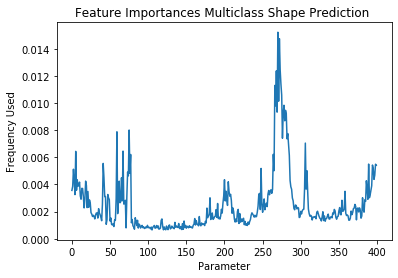

In [9]:
plt.plot(rf_shape_classifier_all.feature_importances_)
plt.title("Feature Importances Multiclass Shape Prediction ")
plt.ylabel("Frequency Used")
plt.xlabel("Parameter")
plt.show()

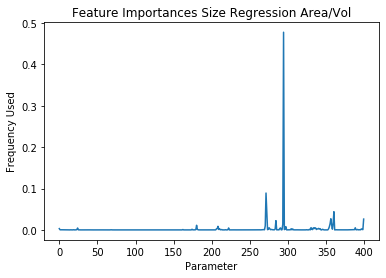

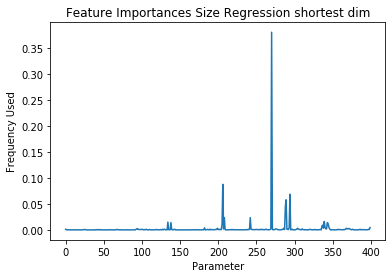

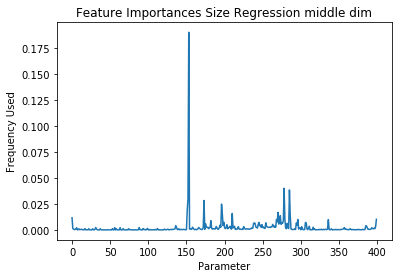

Text(0.5, 0, 'Parameter')

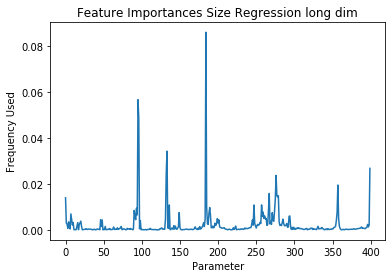

In [10]:
plt.plot(Size_regression_rf_area_vol[1].feature_importances_)
#plt.scatter(293,0.48)
plt.title("Feature Importances Size Regression Area/Vol")
plt.ylabel("Frequency Used")
plt.xlabel("Parameter")
plt.show()
plt.plot(Size_regression_rf_shortest_dim[1].feature_importances_)
#plt.scatter(269,0.40)
plt.title("Feature Importances Size Regression shortest dim")
plt.ylabel("Frequency Used")
plt.xlabel("Parameter")
plt.show()
plt.plot(Size_regression_rf_middle_dim[1].feature_importances_)
plt.title("Feature Importances Size Regression middle dim")
plt.ylabel("Frequency Used")
plt.xlabel("Parameter")
plt.show()
plt.plot(Size_regression_rf_long_dim[1].feature_importances_)
plt.title("Feature Importances Size Regression long dim")
plt.ylabel("Frequency Used")
plt.xlabel("Parameter")

In [11]:
predictions_size_regression_A_V = Size_regression_rf_area_vol[1].predict(spectra_test)
predictions_size_regression_short = Size_regression_rf_shortest_dim[1].predict(spectra_test)
predictions_size_regression_middle = Size_regression_rf_middle_dim[1].predict(spectra_test)
predictions_size_regression_long = Size_regression_rf_long_dim[1].predict(spectra_test)

In [12]:
mse_A_V = mean_squared_error(np.asarray(labels_test_A_V), predictions_size_regression_A_V, multioutput = 'uniform_average')
mse_short = mean_squared_error(np.asarray(labels_test_short), predictions_size_regression_short, multioutput = 'uniform_average')
mse_middle = mean_squared_error(np.asarray(labels_test_mid), predictions_size_regression_middle, multioutput = 'uniform_average')
mse_long = mean_squared_error(np.asarray(labels_test_long), predictions_size_regression_long, multioutput = 'uniform_average')

In [13]:
print("Range", (np.min(np.asarray(labels_test_A_V)), np.max(np.asarray(labels_test_A_V))), 
      (np.min(np.asarray(labels_test_short)), np.max(np.asarray(labels_test_short))), 
      (np.min(np.asarray(labels_test_mid)), np.max(np.asarray(labels_test_mid))), 
      (np.min(np.asarray(labels_test_long)), np.max(np.asarray(labels_test_long))))

print("Averages", np.mean(np.asarray(labels_test_A_V)), np.mean(np.asarray(labels_test_short)), 
      np.mean(np.asarray(labels_test_mid)), np.mean(np.asarray(labels_test_long)))

print("Medians", np.median(np.asarray(labels_test_A_V)), np.median(np.asarray(labels_test_short)), 
      np.median(np.asarray(labels_test_mid)), np.median(np.asarray(labels_test_long)))

print("MSE", mse_A_V, mse_short, mse_middle, mse_long)

Range (-0.09601218950888063, 4.60433024818559) (0.03, 7.029999999999999) (0.0403, 12.23) (0.06060542165732786, 90.68999999999998)
Averages 2.68870001833352 0.5609726063944472 1.6483015914194055 7.190849855850481
Medians 2.7973162061221752 0.23355940652177035 0.8799999999999999 3.98
MSE 0.029452227162854776 0.0667079600768354 0.29453162045438697 15.693661762406688


In [14]:
residuals_A_V = np.square(predictions_size_regression_A_V - np.asarray(labels_test_A_V).T[0])
residuals_short = np.square(predictions_size_regression_short - np.asarray(predictions_size_regression_short).T[0])
residuals_mid = np.square(predictions_size_regression_middle - np.asarray(predictions_size_regression_middle).T[0])
residuals_long = np.square(predictions_size_regression_long - np.asarray(predictions_size_regression_long).T[0])

In [15]:
np.asarray(labels_test_A_V).T[0]

array([3.83217036, 3.02216553, 2.33523359, ..., 3.78348881, 2.69359616,
       4.43835435])

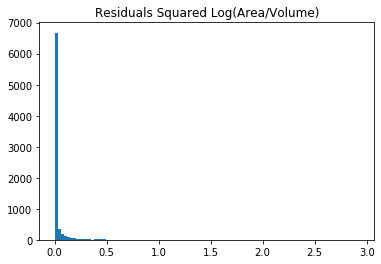

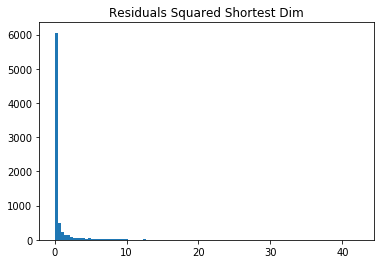

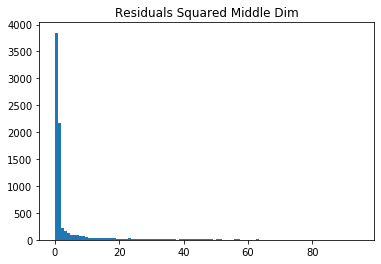

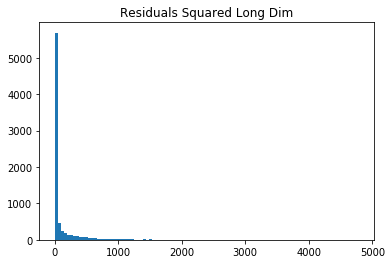

In [16]:
plt.hist(residuals_A_V, 100)
plt.title("Residuals Squared Log(Area/Volume)")
plt.show()
plt.hist(residuals_short, 100)
plt.title("Residuals Squared Shortest Dim")
plt.show()
plt.hist(residuals_mid, 100)
plt.title("Residuals Squared Middle Dim")
plt.show()
plt.hist(residuals_long, 100)
plt.title("Residuals Squared Long Dim")
plt.show()

In [17]:
np.median(residuals_long)

4.972235397897194

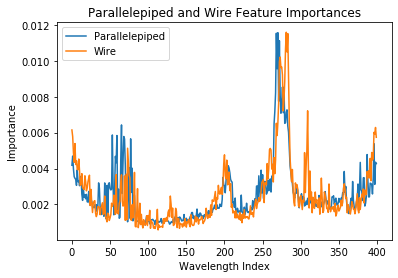

In [20]:
plt.plot(rf_binary_parallelepiped[1].feature_importances_)
plt.plot(rf_binary_wire[1].feature_importances_)
plt.title("Parallelepiped and Wire Feature Importances")
plt.xlabel("Wavelength Index")
plt.ylabel("Importance")
plt.legend(labels = ["Parallelepiped", "Wire"]) 


Text(0, 0.5, 'Importance')

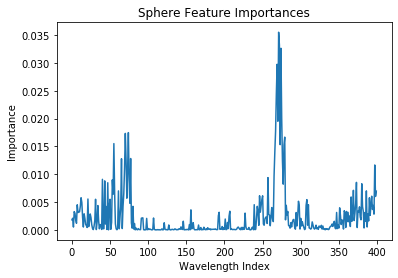

In [21]:
plt.plot(rf_binary_sphere[1].feature_importances_)
plt.title("Sphere Feature Importances")
plt.xlabel("Wavelength Index")
plt.ylabel("Importance")
# Code to label which wavelenghts are the most important. They will likely move slightly if the models are 
# rebuilt, since some random changes in the random forest models will change the important features. 
#plt.scatter(306,0.015) 
#plt.scatter(269,0.04)

Confusion matrix, without normalization
[[0.72 0.18 0.   0.1 ]
 [0.14 0.63 0.   0.23]
 [0.   0.   1.   0.  ]
 [0.06 0.16 0.   0.78]]


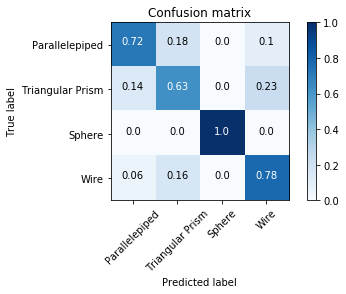

In [24]:
cm_normalized = normalize_cm(rf_shape_classifier_cm, list(rf_shape_classifier_test_set), 4)
plot_confusion_matrix(np.asarray(cm_normalized), ["Parallelepiped", "Triangular Prism", "Sphere", "Wire"])

Build a dataframe where one column is whether the shape was misclassified, and the other is log(area/volume).
Start with all 4 shapes, and then explore for each individual shape 

In [26]:
rf_shape_classifier_test_set

array([0, 1, 0, ..., 0, 2, 0])

[(0.5, 1.05),
 Text(0, 0.5, 'Accuracy'),
 Text(0.5, 1.0, 'Binary Classification Accuracies')]

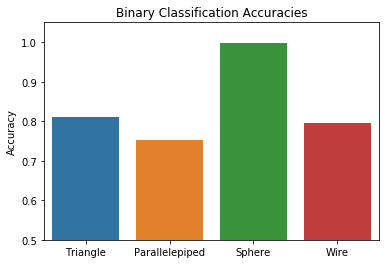

In [31]:
binary_accuracies = (rf_binary_triangle[2], rf_binary_parallelepiped[2], rf_binary_sphere[2], rf_binary_wire[2])
catagories = ["Triangle", "Parallelepiped", "Sphere", "Wire"]
sns.barplot(catagories, binary_accuracies).set(title = "Binary Classification Accuracies", ylabel = "Accuracy", ylim = [0.5, 1.05])

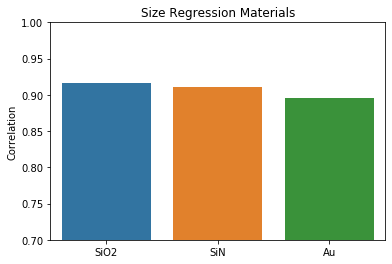

In [40]:
accuracies = [accuracy_size_regression_SiO2, accuracy_size_regression_SiN, accuracy_size_regression_Au]
categories = ["SiO2", "SiN", "Au"]
title = "Size Regression Materials"

sns.barplot(categories, accuracies).set(title = title, ylabel = "Correlation", ylim = [0.7, 1])
plt.savefig(str(title) + '.png', format='png')

Confusion matrix, without normalization
[[0.72 0.18 0.   0.1 ]
 [0.14 0.63 0.   0.23]
 [0.   0.   1.   0.  ]
 [0.06 0.16 0.   0.78]]


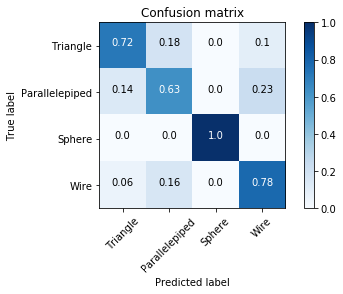

In [63]:
cm = rf_shape_classifier_cm
cm_normalized = normalize_cm(cm, list(rf_shape_classifier_test_set), 4)
plot_confusion_matrix(np.asarray(cm_normalized), ["Triangle", "Parallelepiped", "Sphere", "Wire"])

[(0.5, 1.04),
 Text(0, 0.5, 'Accuracy'),
 Text(0.5, 1.0, 'Shape Classification Accuracies')]

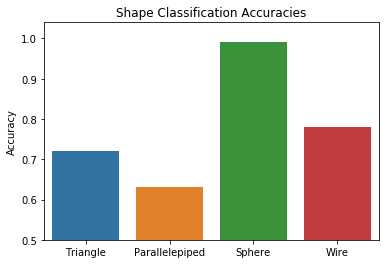

In [60]:
accuracies = (0.72, 0.63, 0.99, 0.78)
catagories = ["Triangle", "Parallelepiped", "Sphere", "Wire"]
sns.barplot(catagories, accuracies).set(title = "Shape Classification Accuracies", ylabel = "Accuracy", ylim = [0.5, 1.04])

In [65]:
predictions = rf_size_regression[1].predict(spectra_test)

In [66]:
labels_test_size = labels_test.drop(columns=['index', 'Material_SiN', 'Geometry_sphere',
                                                                           'Material_SiO2', 'Material_Au',
                                                                           'Geometry_parallelepiped',
                                                                           'Geometry_wire',
                                                                           'Geometry_TriangPrismIsosc'])

In [67]:
labels_test_size

,log Area/Vol,ShortestDim,MiddleDim,LongDim
0,3.832170,0.090000,1.230000,1.350000
1,3.022166,0.140000,0.640000,0.640000
2,2.335234,0.820000,0.820000,0.820000
3,3.998009,0.090000,0.180000,2.380000
4,1.017434,0.820000,12.230000,12.230000
...,...,...,...,...
7808,2.396464,0.390000,1.470000,39.490000
7809,4.536817,0.064245,0.064245,0.064245
7810,3.783489,0.100000,0.440000,1.000000
7811,2.693596,0.405824,0.405824,0.405824


In [68]:
mean_squared_error(np.asarray(labels_test_size), predictions, multioutput = 'uniform_average')

3.9663481563016174

In [69]:
indicies_to_drop_test_list_Parallelepiped = drop_indicies(labels_test, 'Geometry_parallelepiped', 0, False)
indicies_to_drop_test_list_Sphere = drop_indicies(labels_test, 'Geometry_sphere', 0, False)
indicies_to_drop_test_list_Triangle = drop_indicies(labels_test, 'Geometry_TriangPrismIsosc', 0, False)
indicies_to_drop_test_list_Wire = drop_indicies(labels_test, 'Geometry_wire', 0, False)

labels_test_size_Parallelepiped = labels_test_size.drop(indicies_to_drop_test_list_Parallelepiped[1])
labels_test_size_Sphere = labels_test_size.drop(indicies_to_drop_test_list_Sphere[1])
labels_test_size_Triangle = labels_test_size.drop(indicies_to_drop_test_list_Triangle[1])
labels_test_size_Wire = labels_test_size.drop(indicies_to_drop_test_list_Wire[1])

spectra_test_Parallelepiped = spectra_test_df.drop(indicies_to_drop_test_list_Parallelepiped[1])
spectra_test_Sphere = spectra_test_df.drop(indicies_to_drop_test_list_Sphere[1])
spectra_test_Triangle = spectra_test_df.drop(indicies_to_drop_test_list_Triangle[1])
spectra_test_Wire = spectra_test_df.drop(indicies_to_drop_test_list_Wire[1])

In [70]:
predictions_size_regression_Parallelepiped = rf_size_regression[1].predict(spectra_test_Parallelepiped)
predictions_size_regression_Sphere = rf_size_regression[1].predict(spectra_test_Sphere)
predictions_size_regression_Triangle = rf_size_regression[1].predict(spectra_test_Triangle)
predictions_size_regression_Wire = rf_size_regression[1].predict(spectra_test_Wire)

In [71]:
mse_parallelepiped = mean_squared_error(np.asarray(labels_test_size_Parallelepiped), predictions_size_regression_Parallelepiped, multioutput = 'uniform_average')
mse_sphere = mean_squared_error(np.asarray(labels_test_size_Sphere), predictions_size_regression_Sphere, multioutput = 'uniform_average')
mse_triangle = mean_squared_error(np.asarray(labels_test_size_Triangle), predictions_size_regression_Triangle, multioutput = 'uniform_average')
mse_wire = mean_squared_error(np.asarray(labels_test_size_Wire), predictions_size_regression_Wire, multioutput = 'uniform_average')

In [72]:
print(mse_parallelepiped,mse_sphere,mse_triangle,mse_wire)

2.921647691086698 0.004299894327781285 5.963133105905234 3.6100832658215083


[(0, 6.8), Text(0, 0.5, 'MSE'), Text(0.5, 1.0, 'Size Regression MSE')]

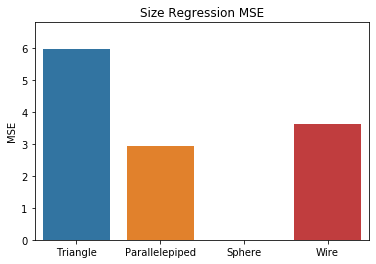

In [73]:
mses = [mse_triangle, mse_parallelepiped, mse_sphere, mse_wire]
catagories = ["Triangle", "Parallelepiped", "Sphere", "Wire"]
sns.barplot(catagories, mses).set(title = "Size Regression MSE", ylabel = "MSE", ylim = [0, 6.8])

In [74]:
accuracy_size_regression_Parallelepiped = rf_size_regression[1].score(spectra_test_Parallelepiped, labels_test_size_Parallelepiped)
accuracy_size_regression_Sphere = rf_size_regression[1].score(spectra_test_Sphere, labels_test_size_Sphere)
accuracy_size_regression_Triangle = rf_size_regression[1].score(spectra_test_Triangle, labels_test_size_Triangle)
accuracy_size_regression_Wire = rf_size_regression[1].score(spectra_test_Wire, labels_test_size_Wire)

[(0.5, 1.04),
 Text(0, 0.5, 'R^2'),
 Text(0.5, 1.0, 'Size Regression Correlation')]

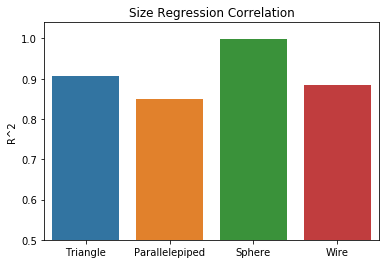

In [75]:
mses = [accuracy_size_regression_Triangle, accuracy_size_regression_Parallelepiped, accuracy_size_regression_Sphere, accuracy_size_regression_Wire]
catagories = ["Triangle", "Parallelepiped", "Sphere", "Wire"]
sns.barplot(catagories, mses).set(title = "Size Regression Correlation", ylabel = "R^2", ylim = [0.5, 1.04])

In [76]:
mses

[0.9058667385442793,
 0.8488878643683283,
 0.9982870861542521,
 0.8848896306944871]